In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## mount drive and retrieve labelled data

from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/DSA4266_Tundra/predictions")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
A549_replicate5 = pd.read_csv("A549_directRNA_replicate5_run1.csv")
A549_replicate6 = pd.read_csv("A549_directRNA_replicate6_run1.csv")
Hct116_replicate3run1 = pd.read_csv("Hct116_directRNA_replicate3_run1.csv")
Hct116_replicate3run4 = pd.read_csv("Hct116_directRNA_replicate3_run4.csv")
Hct116_replicate4 = pd.read_csv("Hct116_directRNA_replicate4_run3.csv")
HepG2_replicate5 = pd.read_csv("HepG2_directRNA_replicate5_run2.csv")
HepG2_replicate6 = pd.read_csv("HepG2_directRNA_replicate6_run1.csv")
K562_replicate4 = pd.read_csv("K562_directRNA_replicate4_run1.csv")
K562_replicate5 = pd.read_csv("K562_directRNA_replicate5_run1.csv")
K562_replicate6 = pd.read_csv("K562_directRNA_replicate6_run1.csv")
MCF7_replicate3 = pd.read_csv("MCF7_directRNA_replicate3_run1.csv")
MCF7_replicate4 = pd.read_csv("MCF7_directRNA_replicate4_run1.csv")

For the below: due to file size (total ~6GB, data here is not pushed to github. The way to generate this data is shown in part_c_merged_data.ipynb.

In [ ]:
A549_replicate5_read = pd.read_csv("A549_directRNA_replicate5_run1_reading.csv")
A549_replicate6_read = pd.read_csv("A549_directRNA_replicate6_run1_reading.csv")
Hct116_replicate3run1_read = pd.read_csv("Hct116_directRNA_replicate3_run1_reading.csv")
Hct116_replicate3run4_read = pd.read_csv("Hct116_directRNA_replicate3_run4_reading.csv")
Hct116_replicate4_read = pd.read_csv("Hct116_directRNA_replicate4_run3_reading.csv")
HepG2_replicate5_read = pd.read_csv("HepG2_directRNA_replicate5_run2_reading.csv")
HepG2_replicate6_read = pd.read_csv("HepG2_directRNA_replicate6_run1_reading.csv")
K562_replicate4_read = pd.read_csv("K562_directRNA_replicate4_run1_reading.csv")
K562_replicate5_read = pd.read_csv("K562_directRNA_replicate5_run1_reading.csv")
K562_replicate6_read = pd.read_csv("K562_directRNA_replicate6_run1_reading.csv")
MCF7_replicate3_read = pd.read_csv("MCF7_directRNA_replicate3_run1_reading.csv")
MCF7_replicate4_read = pd.read_csv("MCF7_directRNA_replicate4_run1_reading.csv")

In [ ]:
df_list = [A549_replicate5,
            A549_replicate6,
            Hct116_replicate3run1,
            Hct116_replicate3run4,
            Hct116_replicate4,
            HepG2_replicate5,
            HepG2_replicate6,
            K562_replicate4,
            K562_replicate5,
            K562_replicate6,
            MCF7_replicate3,
            MCF7_replicate4]

df_name_list = ['A549_replicate5',
                'A549_replicate6',
                'Hct116_replicate3run1',
                'Hct116_replicate3run4',
                'Hct116_replicate4',
                'HepG2_replicate5',
                'HepG2_replicate6',
                'K562_replicate4',
                'K562_replicate5',
                'K562_replicate6',
                'MCF7_replicate3',
                'MCF7_replicate4']

In [ ]:
# add in labels to identify which csv the data comes from
for i in range(len(df_name_list)):
    cell_line = df_name_list[i].split("_")[0]
    replicate = df_name_list[i].split("_")[1]
    df_list[i]['cell_line'] = cell_line
    df_list[i]['replicate'] = replicate

In [ ]:
# union all data together, assuming duplicates are valid because they will be from different readings
# removing those whose transcript_id start with R, ignoring them for now
combined_df = pd.concat(df_list, ignore_index=True)
combined_df = combined_df[~combined_df['transcript_id'].str.startswith('R')]
combined_df

,transcript_id,transcript_position,probability,cell_line,replicate
0,ENST00000418539,108,0.086347,A549,replicate5
1,ENST00000418539,139,0.023725,A549,replicate5
2,ENST00000383898,75,0.031375,A549,replicate5
3,ENST00000610460,78,0.051127,A549,replicate5
4,ENST00000619779,78,0.050027,A549,replicate5
...,...,...,...,...,...
15803529,ENST00000623083,838,0.038139,MCF7,replicate4
15803530,ENST00000623083,882,0.100712,MCF7,replicate4
15803531,ENST00000623083,1279,0.194315,MCF7,replicate4
15803532,ENST00000623083,1326,0.212750,MCF7,replicate4


In [ ]:
# group by cell line, transcript id and position, calculate the average probability, and then give a predicted label for those > 0.5
merged_df = combined_df.groupby(by=['cell_line','transcript_id','transcript_position'])['probability'].mean().reset_index()
merged_df['label'] = merged_df['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
merged_df.head()

,cell_line,transcript_id,transcript_position,probability,label
0,A549,ENST00000000233,244,0.959793,1
1,A549,ENST00000000233,261,0.169651,0
2,A549,ENST00000000233,316,0.024529,0
3,A549,ENST00000000233,332,0.079694,0
4,A549,ENST00000000233,368,0.120121,0


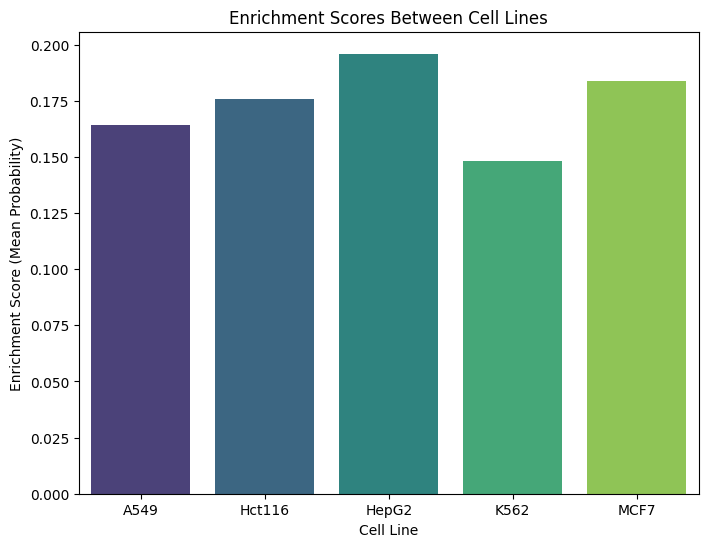

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the mean probability for each cell line
enrichment_scores = merged_df.groupby('cell_line')['probability'].mean().reset_index()

# Plot the enrichment scores
plt.figure(figsize=(8, 6))
sns.barplot(x='cell_line', y='probability', data=enrichment_scores, palette='viridis')
plt.xlabel('Cell Line')
plt.ylabel('Enrichment Score (Mean Probability)')
plt.title('Enrichment Scores Between Cell Lines')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
# Your provided data
import pandas as pd
import numpy as np

# Your provided data
data = [
    [100, 20.33247, 19.0315, 20.6677, 22.58172, 22.21871, 21.25089, 16.73529, 18.20882, 18.12202, 0, 18.66219],
    [20.33247, 100, 26.21246, 26.98751, 24.78963, 25.2064, 28.48048, 21.72653, 24.93347, 24.97676, 0, 27.04933],
    [19.0315, 26.21246, 100, 27.72513, 26.02552, 23.66977, 23.92642, 21.85938, 23.27217, 21.9284, 0, 24.94449],
    [20.6677, 26.98751, 27.72513, 100, 32.8387, 26.47648, 26.82954, 21.54982, 25.93464, 28.53315, 0, 26.02481],
    [22.58172, 24.78963, 26.02552, 32.8387, 100, 26.75233, 27.21214, 19.71137, 23.26111, 25.90986, 0, 23.90225],
    [22.21871, 25.2064, 23.66977, 26.47648, 26.75233, 100, 36.15232, 20.6374, 24.87446, 25.32739, 0, 24.8092],
    [21.25089, 28.48048, 23.92642, 26.82954, 27.21214, 36.15232, 100, 21.43031, 25.90842, 26.33871, 0, 26.03532],
    [16.73529, 21.72653, 21.85938, 21.54982, 19.71137, 20.6374, 21.43031, 100, 28.24, 25.91525, 0, 21.7806],
    [18.20882, 24.93347, 23.27217, 25.93464, 23.26111, 24.87446, 25.90842, 28.24, 100, 32.11266, 0, 24.78506],
    [18.12202, 24.97676, 21.9284, 28.53315, 25.90986, 25.32739, 26.33871, 25.91525, 32.11266, 100, 0, 24.36959],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0],
    [18.66219, 27.04933, 24.94449, 26.02481, 23.90225, 24.8092, 26.03532, 21.7806, 24.78506, 24.36959, 0, 100]
]

# Column and row names
column_names = [
    "A549_replicate5", "A549_replicate6",
    "Hct116_replicate3run1", "Hct116_replicate3run4", "Hct116_replicate4",
    "HepG2_replicate5", "HepG2_replicate6",
    "K562_replicate4", "K562_replicate5", "K562_replicate6",
    "MCF7_replicate3", "MCF7_replicate4"
]

row_names = [
    "A549_replicate5", "A549_replicate6",
    "Hct116_replicate3run1", "Hct116_replicate3run4", "Hct116_replicate4",
    "HepG2_replicate5", "HepG2_replicate6",
    "K562_replicate4", "K562_replicate5", "K562_replicate6",
    "MCF7_replicate3", "MCF7_replicate4"
]

# Create a DataFrame
df = pd.DataFrame(data, columns=column_names, index=row_names)

# Round values to two decimal places
df = df.round(3)


# Print the DataFrame
print(df)


                       A549_replicate5  A549_replicate6  \
A549_replicate5                100.000           20.332   
A549_replicate6                 20.332          100.000   
Hct116_replicate3run1           19.032           26.212   
Hct116_replicate3run4           20.668           26.988   
Hct116_replicate4               22.582           24.790   
HepG2_replicate5                22.219           25.206   
HepG2_replicate6                21.251           28.480   
K562_replicate4                 16.735           21.727   
K562_replicate5                 18.209           24.933   
K562_replicate6                 18.122           24.977   
MCF7_replicate3                  0.000            0.000   
MCF7_replicate4                 18.662           27.049   

                       Hct116_replicate3run1  Hct116_replicate3run4  \
A549_replicate5                       19.032                 20.668   
A549_replicate6                       26.212                 26.988   
Hct116_replicate3ru

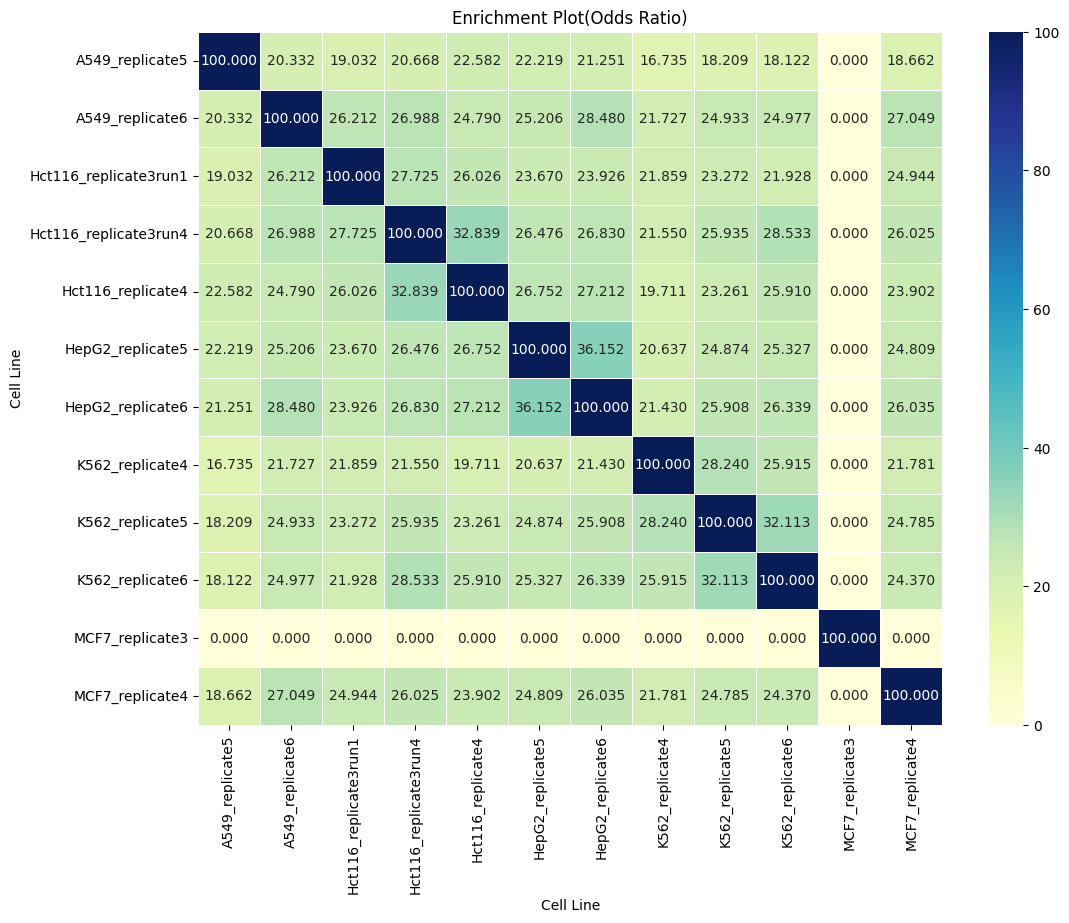

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Round values to two decimal places


plt.figure(figsize=(12, 9))
sns.heatmap(df.astype(float), annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)

# Add labels and title
plt.title('Enrichment Plot(Odds Ratio)')
plt.xlabel('Cell Line')
plt.ylabel('Cell Line')

# Show the plot
plt.show()